#### Смотрим количество границ на каждой картине

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [2]:
load_dotenv()
folder_path = os.getenv('file_path_Munch')

In [3]:
def process_images(folder_path):
    results = {}
    
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)
            
            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            edges = cv2.Canny(image, 100, 200)
            edge_length = np.sum(edges > 0)
            height, width = image.shape
            area = height * width
            normalized_length = edge_length / area
            
            results[filename] = normalized_length
    
    return results

def plot_results(results):
    filenames = list(results.keys())
    values = list(results.values())
    bar_width = 1.5
    plt.figure(figsize=(50, 10))
    plt.bar(filenames, values, color='skyblue', width=bar_width)
    plt.xlabel('Image Filename')
    plt.ylabel('Normalized Edge Length')
    plt.title('Edge Length Normalized by Image Area')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


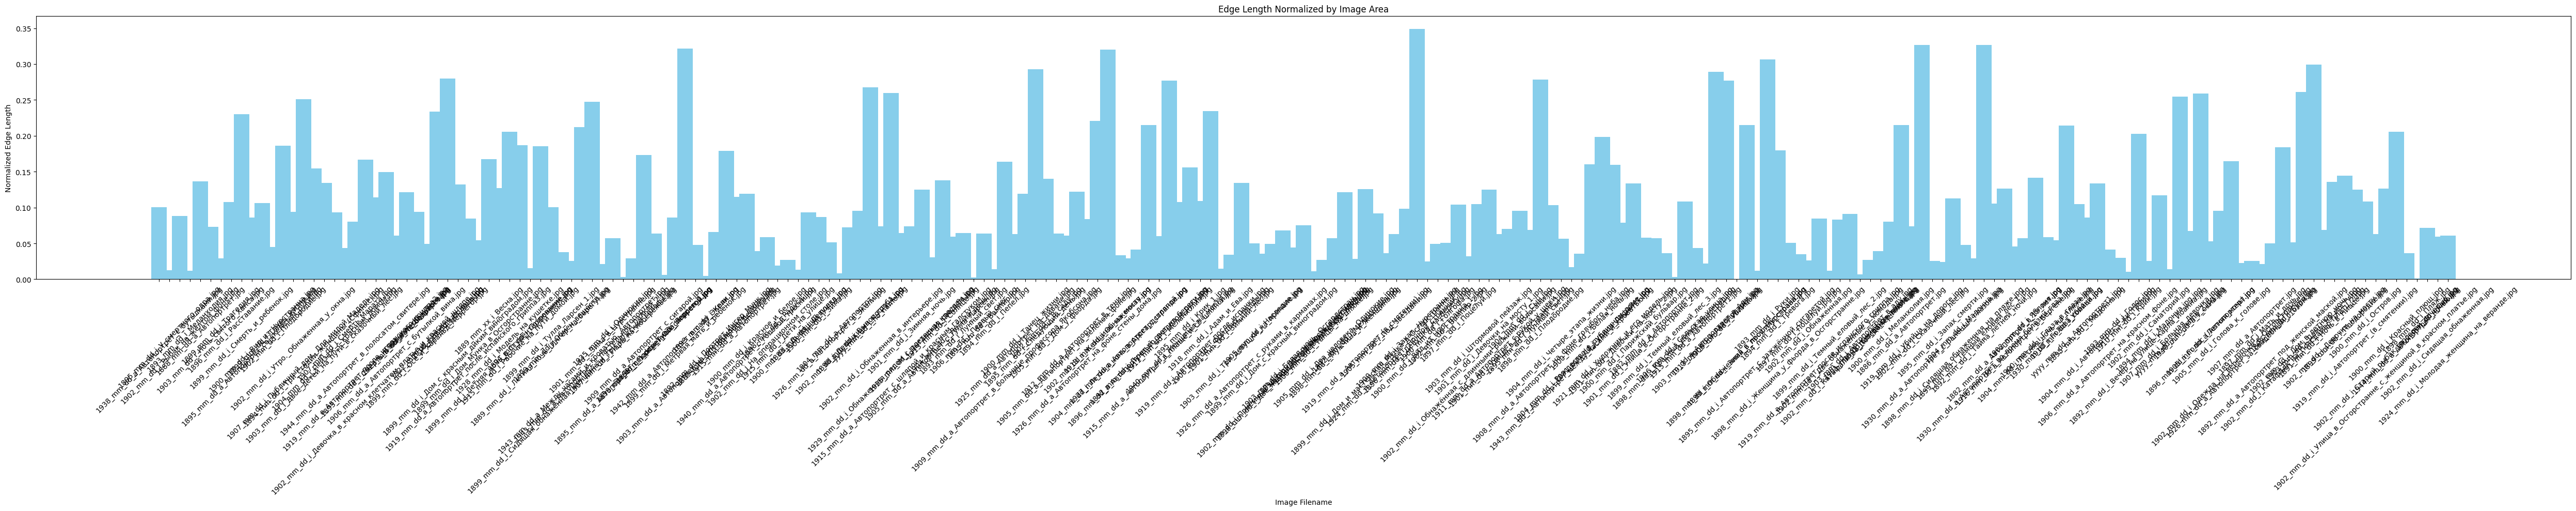

In [4]:
res = process_images(folder_path)

plot_results(res)

#### Смотрим количество границ на картинах за год

In [5]:
def process_images(folder_path):
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)
            year = filename.split('_')[0]
            if year == "yyyy":
                continue

            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

            edges = cv2.Canny(image, 100, 200)
            edge_length = np.sum(edges > 0)
            height, width = image.shape
            area = height * width

            normalized_length = edge_length / area

            if year in results:
                results[year].append(normalized_length)
            else:
                results[year] = [normalized_length]

    averaged_results = {year: np.mean(values) for year, values in results.items()}

    sorted_results = dict(sorted(averaged_results.items(), key=lambda x: int(x[0])))

    return sorted_results

In [6]:
def plot_results(results):
    years = list(results.keys())
    values = list(results.values())
    bar_width = 0.5
    plt.figure(figsize=(10, 5))
    plt.bar(years, values, color='skyblue', width=bar_width)
    plt.xlabel('Year')
    plt.ylabel('Average Normalized Edge Length')
    plt.title('Average Edge Length Normalized by Image Area per Year')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

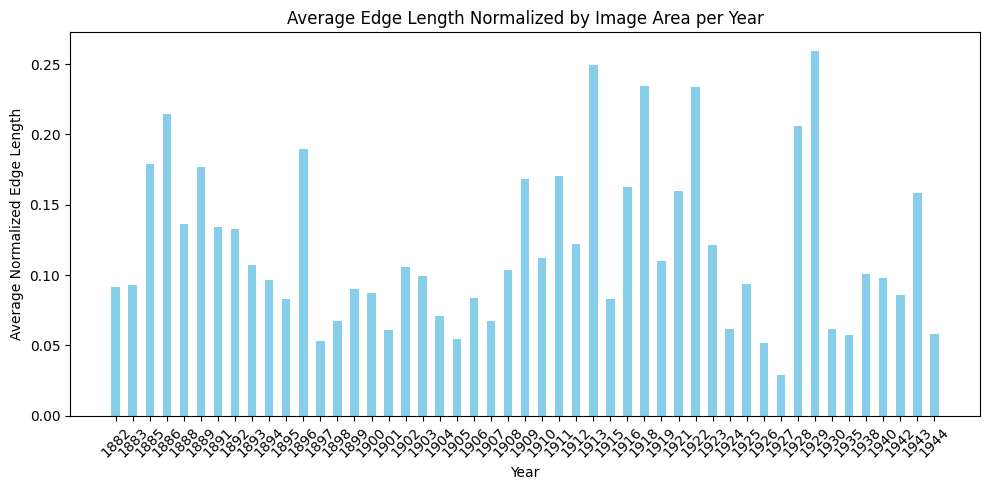

In [7]:
res = process_images(folder_path)

plot_results(res)

#### Смотрим количество прямых линий на картинах за год

In [8]:
def process_images(folder_path):
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)
            year = filename.split('_')[0]
            if year == "yyyy":
                continue

            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            edges = cv2.Canny(image, 100, 200)

            lines = cv2.HoughLinesP(edges, 
                                    1, # шаг в пикселях по оси x
                                    np.pi / 180, # шаг в радианах по углу
                                    threshold=50, # минимальное количество точек на линии
                                    minLineLength=50, # минимальная длина линии
                                    maxLineGap=10) # максимальный разрыв между частями линии
            num_lines = len(lines) if lines is not None else 0

            height, width = image.shape
            area = height * width
            normalized_lines = num_lines / area

            if year in results:
                results[year].append(normalized_lines)
            else:
                results[year] = [normalized_lines]

    averaged_results = {year: np.mean(values) for year, values in results.items()}
    sorted_results = dict(sorted(averaged_results.items(), key=lambda x: int(x[0])))
    
    return sorted_results

In [9]:
def plot_results(results):
    years = list(results.keys())
    values = list(results.values())
    bar_width = 0.5
    plt.figure(figsize=(10, 5))
    plt.bar(years, values, color='skyblue', width=bar_width)
    plt.xlabel('Year')
    plt.ylabel('Average Normalized Line Count')
    plt.title('Average Normalized Line Count per Year')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

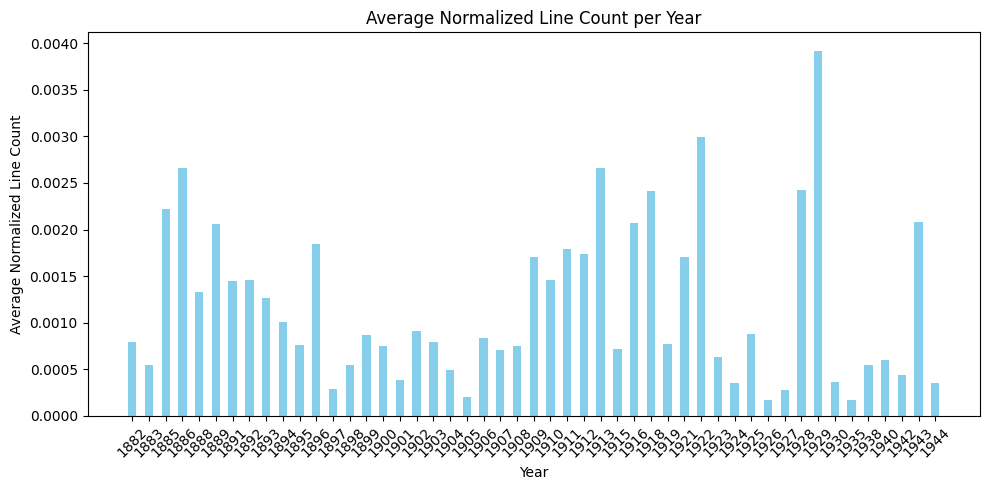

In [10]:
res = process_images(folder_path)
plot_results(res)

In [11]:
def process_images(folder_path):
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)
            year = filename.split('_')[0]
            if year == "yyyy":
                continue

            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            edges = cv2.Canny(image, 100, 200)

            lines = cv2.HoughLinesP(edges, 
                                    1, # шаг в пикселях по оси x
                                    np.pi / 180, # шаг в радианах по углу
                                    threshold=10, # минимальное количество точек на линии
                                    minLineLength=10, # минимальная длина линии
                                    maxLineGap=10) # максимальный разрыв между частями линии
            num_lines = len(lines) if lines is not None else 0

            height, width = image.shape
            area = height * width
            normalized_lines = num_lines / area

            if year in results:
                results[year].append(normalized_lines)
            else:
                results[year] = [normalized_lines]

    averaged_results = {year: np.mean(values) for year, values in results.items()}
    sorted_results = dict(sorted(averaged_results.items(), key=lambda x: int(x[0])))
    
    return sorted_results

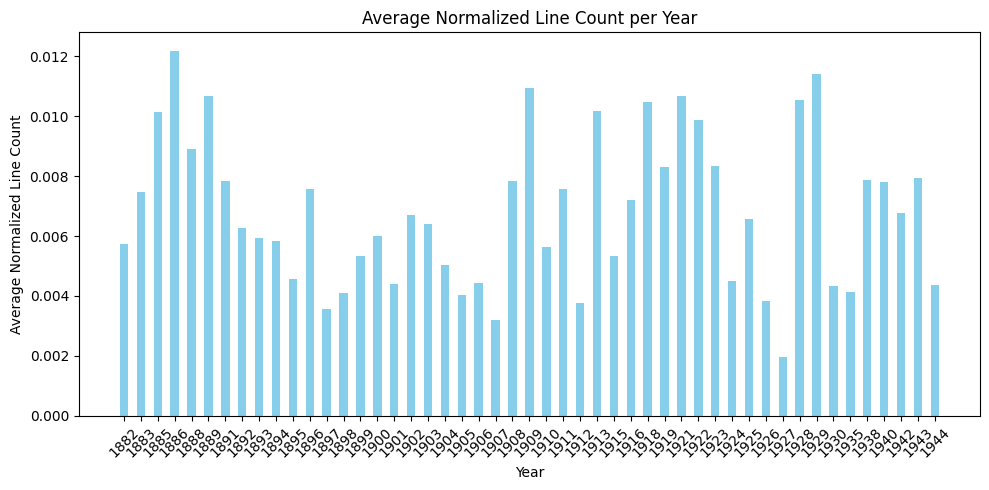

In [12]:
res = process_images(folder_path)
plot_results(res)

#### Смотрим длину прямых линий за год

In [13]:
def process_images(folder_path):
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)
            year = filename.split('_')[0]
            if year == "yyyy":
                continue

            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            edges = cv2.Canny(image, 50, 150)

            lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

            total_line_length = 0
            if lines is not None:
                for line in lines:
                    x1, y1, x2, y2 = line[0]
                    length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) # length of a line
                    total_line_length += length

            if year in results:
                results[year].append(total_line_length)
            else:
                results[year] = [total_line_length]

    averaged_results = {year: np.mean(values) for year, values in results.items()}
    sorted_results = dict(sorted(averaged_results.items(), key=lambda x: int(x[0])))

    return sorted_results

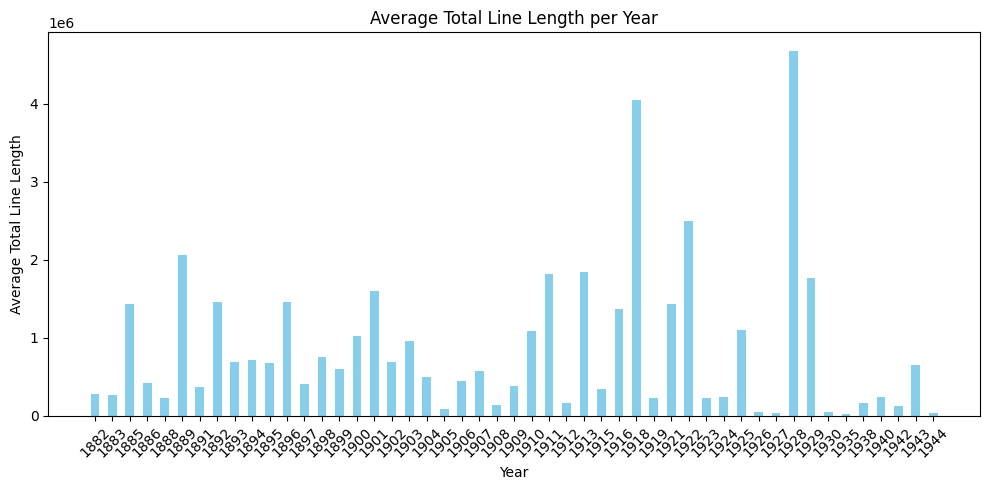

In [14]:
def plot_results(results):
    years = list(results.keys())
    values = list(results.values())
    bar_width = 0.5
    plt.figure(figsize=(10, 5))
    plt.bar(years, values, color='skyblue', width=bar_width)
    plt.xlabel('Year')
    plt.ylabel('Average Total Line Length')
    plt.title('Average Total Line Length per Year')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

res = process_images(folder_path)
plot_results(res)

#### Смотрим количество кружков на каждой картине

In [ ]:
def process_images(folder_path):
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)

            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

            blurred = cv2.GaussianBlur(image, (9, 92), 2)

            circles = cv2.HoughCircles(
                blurred, 
                cv2.HOUGH_GRADIENT, 
                dp=1.2, 
                minDist=20, 
                param1=50, 
                param2=30, 
                minRadius=10, 
                maxRadius=100
            )

            num_circles = 0 if circles is None else len(circles[0])

            results[filename] = num_circles

    return results

In [19]:
def plot_results(results):
    filenames = list(results.keys())
    values = list(results.values())
    bar_width = 0.5
    plt.figure(figsize=(50, 10))
    plt.bar(filenames, values, color='skyblue', width=bar_width)
    plt.xlabel('Image Filename')
    plt.ylabel('Number of Circles')
    plt.title('Number of Circles Detected in Each Image')
    plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()
    plt.show()

In [20]:
results = process_images(folder_path)

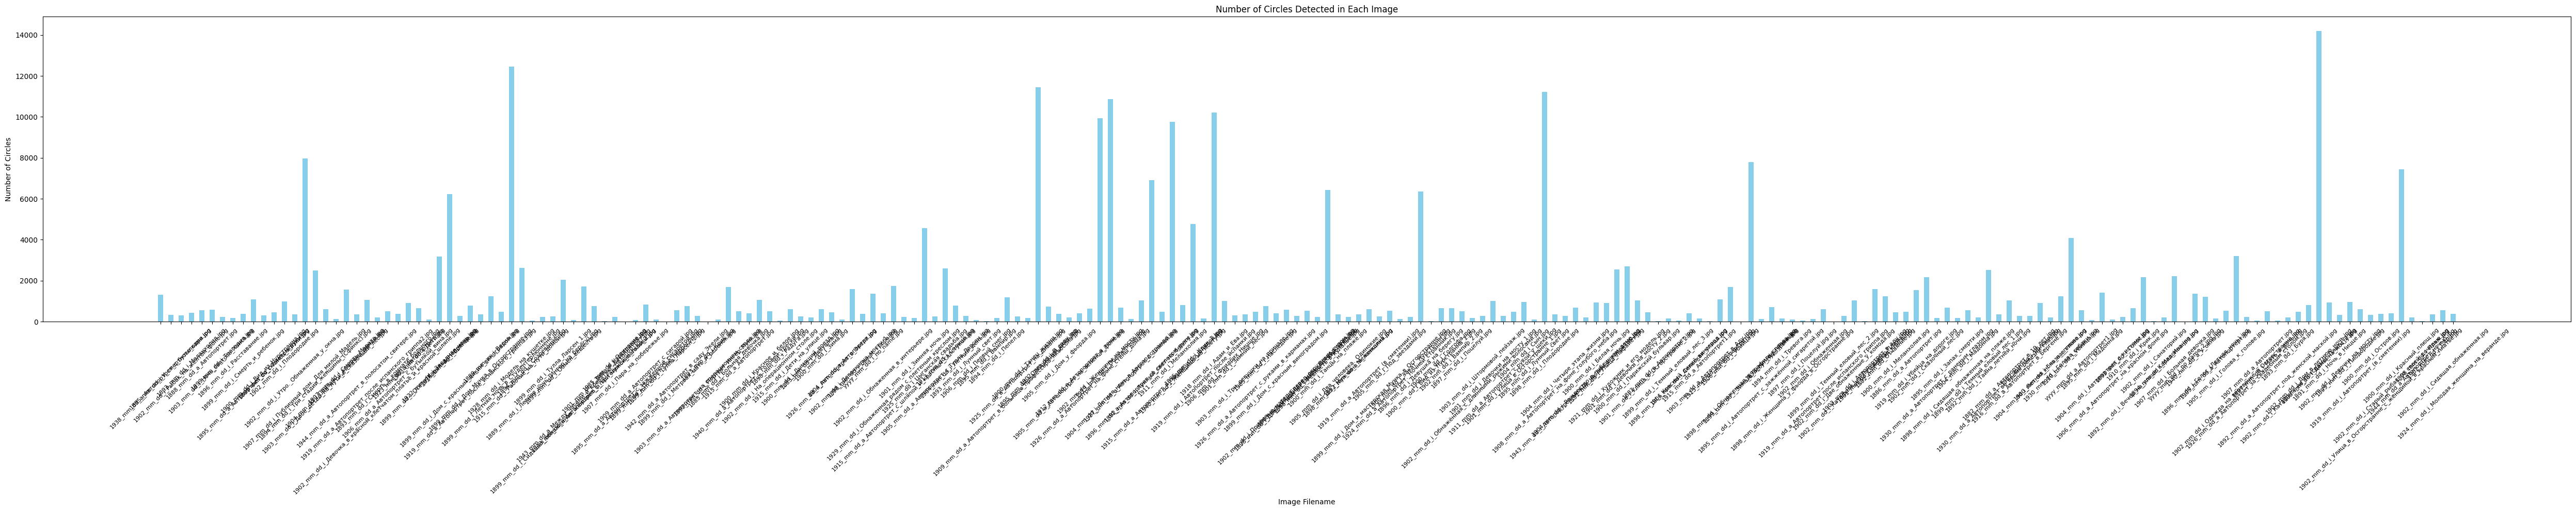

In [21]:
plot_results(results)

#### Смотрим количество кружков за каждый год

In [27]:
def process_images(folder_path):
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)

            year = filename.split('_')[0]
            if year == "yyyy":
                continue

            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

            blurred = cv2.GaussianBlur(image, (9, 9), 2)

            circles = cv2.HoughCircles(
                blurred, 
                cv2.HOUGH_GRADIENT, 
                dp=1.2, 
                minDist=20, 
                param1=50, 
                param2=30, 
                minRadius=10, 
                maxRadius=100
            )

            num_circles = 0 if circles is None else len(circles[0])

            if year not in results:
                results[year] = 0
            results[year] += num_circles

    return results

results = process_images(folder_path)

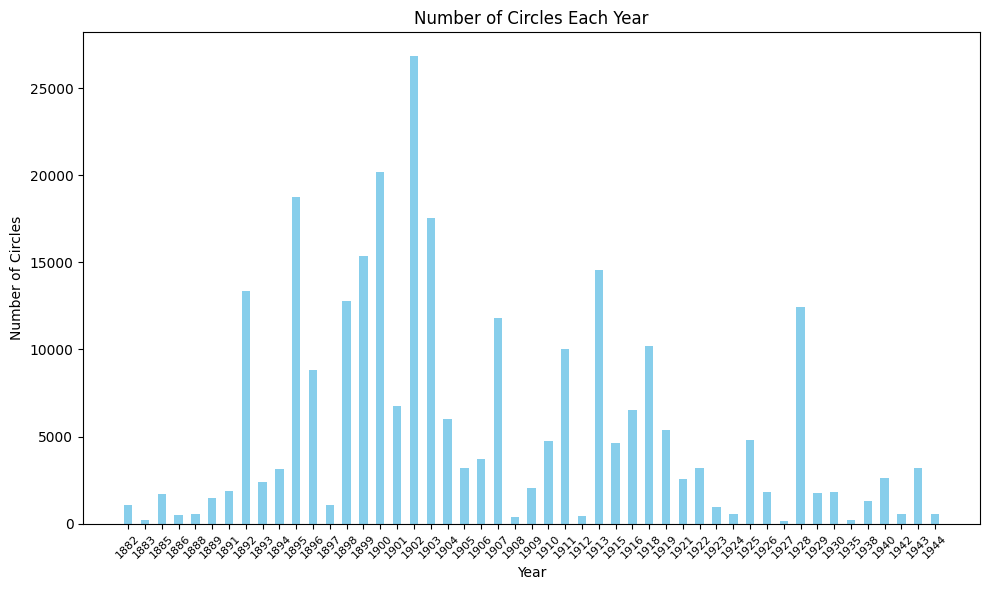

In [30]:
def plot_results(results):
    sorted_results = dict(sorted(results.items()))
    years = list(sorted_results.keys())
    values = list(sorted_results.values())
    bar_width = 0.5
    plt.figure(figsize=(10, 6))
    plt.bar(years, values, color='skyblue', width=bar_width)
    plt.xlabel('Year')
    plt.ylabel('Number of Circles')
    plt.title('Number of Circles Each Year')
    plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()
    plt.show()
    
plot_results(results)